Predict model for COVID-19 cases.

<br>

The variables in the dataset is written below:

 - **id**<br>
 - **sex**<br>
 - **patient_type**<br>
 - **intubed**<br>
 - **pneumonia**<br>
 - **age**<br>
 - **pregnancy**<br>
 - **diabetes**<br>
 - **copd**<br>
 - **asthma**<br>
 - **inmsupr**<br>
 - **hypertension**<br>
 - **ohter_disease**<br>
 - **cardiovascular**<br>
 - **obesity**<br>
 - **renal_chronic**<br>
 - **tobacco**<br>
 - **contact_other_covid**<br>
 - **icu**<br>
 - **covid_res**<br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [14]:
df = pd.read_csv("COVID.csv")

In [3]:
df.head()

,Unnamed: 0,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499692 entries, 0 to 499691
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           499692 non-null  int64  
 1   sex                  499692 non-null  int64  
 2   patient_type         499692 non-null  int64  
 3   intubed              107424 non-null  float64
 4   pneumonia            499681 non-null  float64
 5   age                  499692 non-null  int64  
 6   pregnancy            245258 non-null  float64
 7   diabetes             498051 non-null  float64
 8   copd                 498246 non-null  float64
 9   asthma               498250 non-null  float64
 10  inmsupr              498030 non-null  float64
 11  hypertension         498203 non-null  float64
 12  other_disease        497499 non-null  float64
 13  cardiovascular       498183 non-null  float64
 14  obesity              498222 non-null  float64
 15  renal_chronic    

Removendo duplicatas

In [5]:
df = df.drop_duplicates()
df.shape

(499692, 20)

<AxesSubplot:>

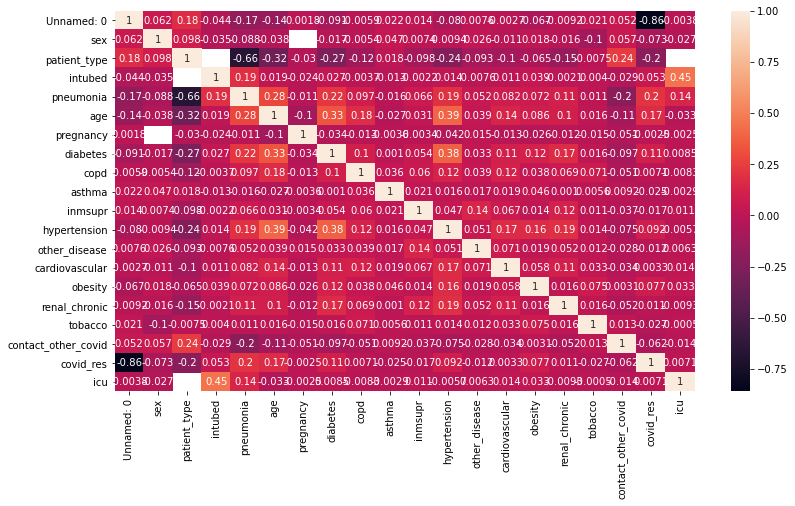

In [6]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(), annot = True)

There is no strong correlation, so we can proceed without drop any variable.

Drop NA rows of some variables that has a few null values instead of filling it.

In [7]:
colunas = ['pneumonia','age','diabetes','copd','asthma','inmsupr','hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco']

In [15]:
df_c = df.dropna(subset=colunas)
df_c.shape

(496291, 20)

Os dados faltantes restantes será preenchido com outro valor (-1)

In [16]:
df_c = df_c.fillna(value=-1)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496291 entries, 0 to 499691
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           496291 non-null  int64  
 1   sex                  496291 non-null  int64  
 2   patient_type         496291 non-null  int64  
 3   intubed              496291 non-null  float64
 4   pneumonia            496291 non-null  float64
 5   age                  496291 non-null  int64  
 6   pregnancy            496291 non-null  float64
 7   diabetes             496291 non-null  float64
 8   copd                 496291 non-null  float64
 9   asthma               496291 non-null  float64
 10  inmsupr              496291 non-null  float64
 11  hypertension         496291 non-null  float64
 12  other_disease        496291 non-null  float64
 13  cardiovascular       496291 non-null  float64
 14  obesity              496291 non-null  float64
 15  renal_chronic    

Converter colunas em 'float' para 'int'

In [20]:
col_float = ['pregnancy','icu','intubed','contact_other_covid','pneumonia','diabetes','copd','asthma','inmsupr','hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid']

In [21]:
for c in col_float:
    df_c[c] = pd.to_numeric(df_c[c], downcast='integer')

In [22]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496291 entries, 0 to 499691
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Unnamed: 0           496291 non-null  int64
 1   sex                  496291 non-null  int64
 2   patient_type         496291 non-null  int64
 3   intubed              496291 non-null  int8 
 4   pneumonia            496291 non-null  int8 
 5   age                  496291 non-null  int64
 6   pregnancy            496291 non-null  int8 
 7   diabetes             496291 non-null  int8 
 8   copd                 496291 non-null  int8 
 9   asthma               496291 non-null  int8 
 10  inmsupr              496291 non-null  int8 
 11  hypertension         496291 non-null  int8 
 12  other_disease        496291 non-null  int8 
 13  cardiovascular       496291 non-null  int8 
 14  obesity              496291 non-null  int8 
 15  renal_chronic        496291 non-null  int8 
 16  to

Dropping the column (Unnamed: 0)

In [24]:
df_c = df_c.drop('Unnamed: 0', axis=1)

## Data Modeling

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

Separating the training and testing dataset

In [26]:
msk = np.random.rand(len(df_c)) < 0.8  # build a mask with the positions
df_train = df_c[msk]
df_test = df_c[~msk]
print(df_train.shape, df_test.shape)

(397734, 19) (98557, 19)


In [27]:
X = df_train.drop(['covid_res'], axis=1)
y = df_train['covid_res']

print(X.shape, y.shape)

(397734, 18) (397734,)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=12)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(278413, 18) (278413,)
(119321, 18) (119321,)


In [29]:
def models (X_train, X_valid, y_train, y_valid):
    modelo_rf = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=12)
    modelo_ab = AdaBoostClassifier(n_estimators=20, random_state=12)
    modelo_lg = LGBMClassifier(n_estimators=50, max_depth=7, learning_rate=0.1, is_unbalance=True, importance_type='gain')
    
    modelo_rf.fit(X_train, y_train)
    modelo_ab.fit(X_train, y_train)
    modelo_lg.fit(X_train, y_train)
    
    y_train_pred_rf = modelo_rf.predict(X_train)
    y_valid_pred_rf = modelo_rf.predict(X_valid)
    
    y_train_pred_ab = modelo_ab.predict(X_train)
    y_valid_pred_ab = modelo_ab.predict(X_valid)
    
    y_train_pred_lg = modelo_lg.predict(X_train)
    y_valid_pred_lg = modelo_lg.predict(X_valid)
    
    ft_imp_rf = modelo_rf.feature_importances_
    ft_imp_ab = modelo_ab.feature_importances_
    ft_imp_lg = modelo_lg.feature_importances_
    
    return y_train_pred_rf, y_valid_pred_rf, y_train_pred_ab, y_valid_pred_ab, y_train_pred_lg, y_valid_pred_lg, ft_imp_rf, ft_imp_ab, ft_imp_lg

In [30]:
y_train_pred_rf, y_valid_pred_rf, y_train_pred_ab, y_valid_pred_ab, y_train_pred_lg, y_valid_pred_lg, ft_imp_rf, ft_imp_ab, ft_imp_lg = \
models(X_train,X_valid,y_train,y_valid)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

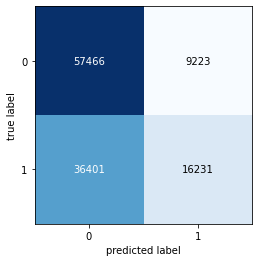

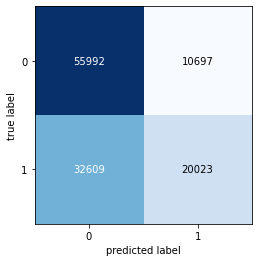

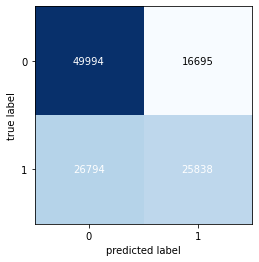

In [31]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(conf_mat=confusion_matrix(y_valid, y_valid_pred_rf),)

plot_confusion_matrix(conf_mat=confusion_matrix(y_valid, y_valid_pred_ab))

plot_confusion_matrix(conf_mat=confusion_matrix(y_valid, y_valid_pred_lg))


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# RandomForest
acc_train_rf = accuracy_score(y_train, y_train_pred_rf)
prec_train_rf = precision_score(y_train, y_train_pred_rf)
rec_train_rf = recall_score(y_train, y_train_pred_rf)

acc_valid_rf = accuracy_score(y_valid, y_valid_pred_rf)
prec_valid_rf = precision_score(y_valid, y_valid_pred_rf)
rec_valid_rf = recall_score(y_valid, y_valid_pred_rf)
# AdaBoosting
acc_train_ab = accuracy_score(y_train, y_train_pred_ab)
prec_train_ab = precision_score(y_train, y_train_pred_ab)
rec_train_ab = recall_score(y_train, y_train_pred_ab)

acc_valid_ab = accuracy_score(y_valid, y_valid_pred_ab)
prec_valid_ab = precision_score(y_valid, y_valid_pred_ab)
rec_valid_ab = recall_score(y_valid, y_valid_pred_ab)
# LightGBM
acc_train_lg = accuracy_score(y_train, y_train_pred_lg)
prec_train_lg = precision_score(y_train, y_train_pred_lg)
rec_train_lg = recall_score(y_train, y_train_pred_lg)

acc_valid_lg = accuracy_score(y_valid, y_valid_pred_lg)
prec_valid_lg = precision_score(y_valid, y_valid_pred_lg)
rec_valid_lg = recall_score(y_valid, y_valid_pred_lg)

print(f'RandomForest\nTrain:\nAcc: {acc_train_rf:.2f}, Precision: {prec_train_rf:.2f}, Recall: {rec_train_rf:.2f}')
print(f'Test:\nAcc: {acc_valid_rf:.2f}, Precision: {prec_valid_rf:.2f}, Recall: {rec_valid_rf:.2f}')
print('-'*20)
print(f'AdaBoosting\nTrain:\nAcc: {acc_train_ab:.2f}, Precision: {prec_train_ab:.2f}, Recall: {rec_train_ab:.2f}')
print(f'Test:\nAcc: {acc_valid_ab:.2f}, Precision: {prec_valid_ab:.2f}, Recall: {rec_valid_ab:.2f}')
print('-'*20)
print(f'LightGBM\nTrain:\nAcc: {acc_train_lg:.2f}, Precision: {prec_train_lg:.2f}, Recall: {rec_train_lg:.2f}')
print(f'Test:\nAcc: {acc_valid_lg:.2f}, Precision: {prec_valid_lg:.2f}, Recall: {rec_valid_lg:.2f}')

RandomForest
Training:
Acc: 0.62, Precision: 0.64, Recall: 0.31
Testing:
Acc: 0.62, Precision: 0.64, Recall: 0.31
--------------------
AdaBoosting
Training:
Acc: 0.64, Precision: 0.65, Recall: 0.38
Testing:
Acc: 0.64, Precision: 0.65, Recall: 0.38
--------------------
LightGBM
Training:
Acc: 0.64, Precision: 0.61, Recall: 0.49
Testing:
Acc: 0.64, Precision: 0.61, Recall: 0.49


In [33]:
feat_rf = dict(zip(X_train.columns, ft_imp_rf))
df_feat_rf = pd.DataFrame.from_dict(feat_rf, orient='index', columns=['values'])
df_feat_rf = df_feat_rf['values'].sort_values(ascending=False)

feat_ab = dict(zip(X_train.columns, ft_imp_ab))
df_feat_ab = pd.DataFrame.from_dict(feat_ab, orient='index', columns=['values'])
df_feat_ab = df_feat_ab['values'].sort_values(ascending=False)

feat_lg = dict(zip(X_train.columns, ft_imp_lg))
df_feat_lg = pd.DataFrame.from_dict(feat_lg, orient='index', columns=['values'])
df_feat_lg = df_feat_lg['values'].sort_values(ascending=False)

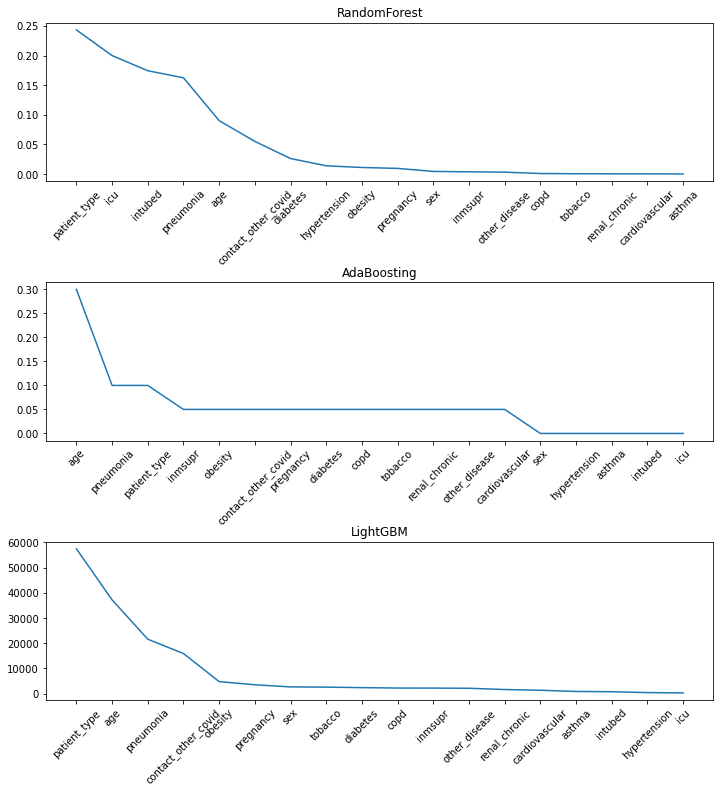

In [34]:

fig, axs = plt.subplots(3,figsize=(10,10))
fig.tight_layout(h_pad=8)
axs[0].plot(df_feat_rf)
axs[0].set_title("RandomForest")
axs[1].plot(df_feat_ab)
axs[1].set_title("AdaBoosting")
axs[2].plot(df_feat_lg)
axs[2].set_title("LightGBM")
axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)
axs[2].tick_params(axis='x', rotation=45)

## Optimization

The chosen model is LightGBM. Although it has a lower precision, the recall is way better than the others. The metric 'recall' will be wokerd on to cover a larger number of people that is infected

In [52]:
modelo = LGBMClassifier(n_estimators=70, max_depth=1, learning_rate=1, is_unbalance=True, importance_type='gain')
modelo

LGBMClassifier(importance_type='gain', is_unbalance=True, learning_rate=1,
               max_depth=1, n_estimators=70)

In [53]:
modelo.fit(X_train, y_train)

LGBMClassifier(importance_type='gain', is_unbalance=True, learning_rate=1,
               max_depth=1, n_estimators=70)

In [54]:
y_train_pred = modelo.predict(X_train)
y_valid_pred = modelo.predict(X_valid)
print(y_train_pred.shape, y_valid_pred.shape)

(278413,) (119321,)


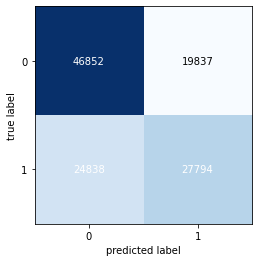

In [55]:
cm = confusion_matrix(y_valid, y_valid_pred)
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Train:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Test:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Training:
Acc: 0.62, Precision: 0.58, Recall: 0.53
Testing:
Acc: 0.63, Precision: 0.58, Recall: 0.53


GridSearch will be used to get the best hyperparameters to increase the metric 'recall'

In [40]:
from sklearn.model_selection import GridSearchCV

In [50]:
parameters = {
    'max_depth': [1, 2, 3, 4, 5],
    'n_estimators': [10, 50, 70, 90, 100], 
    'learning_rate': [0.3, 0.5, 0.7, 0.9, 1],
    'is_unbalance': [True, False],
    'importance_type': ['gain', 'split']
}

clf = GridSearchCV(modelo, parameters, verbose=3, scoring='recall')

clf.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=1, n_estimators=70; total time=   0.2s
[CV 2/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=1, n_estimators=70; total time=   0.2s
[CV 3/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=1, n_estimators=70; total time=   0.3s
[CV 4/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=1, n_estimators=70; total time=   0.3s
[CV 5/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=1, n_estimators=70; total time=   0.3s
[CV 1/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=1, n_estimators=90; total time=   0.3s
[CV 2/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=1, n_estimators=90; total time=   0.3s
[CV 3/5] END importance_type=gain, is_unbalance=True, learning_rate=1, max_depth=1, n_estimators=90;

GridSearchCV(estimator=LGBMClassifier(importance_type='gain', is_unbalance=True,
                                      learning_rate=1, max_depth=1,
                                      n_estimators=50),
             param_grid={'importance_type': ['gain'], 'is_unbalance': [True],
                         'learning_rate': [1], 'max_depth': [1],
                         'n_estimators': [70, 90, 110]},
             scoring='recall', verbose=3)

In [51]:
clf.best_params_

{'importance_type': 'gain',
 'is_unbalance': True,
 'learning_rate': 1,
 'max_depth': 1,
 'n_estimators': 70}

## Testing dataset

In [58]:
X_test = df_test.drop(['covid_res'], axis=1)
y_test = df_test['covid_res']

print(X.shape, y.shape)

(397734, 18) (397734,)


In [59]:
y_test_pred = modelo.predict(X_test)

In [60]:
acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)

print(f'Teste:\nAcc: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}')

Test:
Acc: 0.62, Precision: 0.58, Recall: 0.53


It is noticed that the model was not overfitted and the metrics obtained in the test dataset were satisfactory.

## Fitting the model with .predict_proba

In [69]:
modelo_pp = modelo.predict_proba(X_test)[:,1]
modelo_pp

array([0.49016873, 0.72239044, 0.76135041, ..., 0.82080857, 0.41780562,
       0.50349441])

In [70]:
corte = 0.3 # Setting the minimum probability to be diagnosed as infected
modelo_pp = modelo_pp > corte
modelo_pp = pd.Series(modelo_pp).map({True: 1, False: 0})
modelo_pp

0        1
1        1
2        1
3        1
4        1
        ..
98552    1
98553    0
98554    1
98555    1
98556    1
Length: 98557, dtype: int64

In [71]:
acc_test = accuracy_score(y_test, modelo_pp)
prec_test = precision_score(y_test, modelo_pp)
rec_test = recall_score(y_test, modelo_pp)

print(f'Test:\nAcc: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}')

Teste:
Acc: 0.46, Precision: 0.45, Recall: 0.98


## Conclusions

It is observed that the main parameters to be evaluated are: 
- patient_type;
- age;
- pneumonia.

The chosen model was the LightGBM because it has a higher recall than the others. 

Recall was chosen as the main metric of the analyzes to indicate a percentage of correct answers from everyone who was actually infected

The first result was:

    Train:
    Acc: 0.64, Precision: 0.61, Recall: 0.49
    Test:
    Acc: 0.64, Precision: 0.61, Recall: 0.49

The result obtained after the optimization:

    Train:
    Acc: 0.62, Precision: 0.58, Recall: 0.53
    Test:
    Acc: 0.63, Precision: 0.58, Recall: 0.53

With the .predict_proba was possible to achieve the result:
    
    Acc: 0.46, Precision: 0.45, Recall: 0.98

A drop in precision is observed, since the intention is to cover a high percentage of infected people, it is likely that the model will have a greater volume of false positives, increasing the 'recall' and decreasing the 'precision'.

Some tests were done with the exclusion of columns that have several missing data, but a better model was obtained by leaving the columns and assigning the value (-1) to the missing data. It was not filled with 0 or 1 randomly because it could be that the model is distorted with reality. In addition, rows with null data were removed from other columns that had a smaller amount of missing data.